# Titanic Example

In [149]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'data/titanic_train.csv')


# Explore

In [73]:
data.sample(5)
data.shape

(891, 12)

In [148]:
# nan in Age, cabin
# Embarked is likely not relevant but only 2 nans so remove rows
# cabin, maybe letter is important
# 687 nans for cabin so maybe remove column
# 20% of age are nans so drop rows as is important metric

# ticket inconsistent and note sure what they mean so remove
# remove Name and PassengerId (unless conencted to area on boat but we have 

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Nan values

In [223]:
#nans
#remove cabin
cleaned = data.drop(['Name', 'PassengerId', 'Cabin','Ticket'], axis=1)
#remove rows of nans
cleaned.isna().sum()
cleaned['Age'] = cleaned['Age'].astype(float)
cleaned.loc[cleaned['Age'].isna(),:] = cleaned['Age'].mean()
# cleaned = cleaned.dropna()


C:\Users\samfi\AppData\Local\Temp\ipykernel_22816\4117111422.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.69911764705882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned.loc[cleaned['Age'].isna(),:] = cleaned['Age'].mean()
C:\Users\samfi\AppData\Local\Temp\ipykernel_22816\4117111422.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.69911764705882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cleaned.loc[cleaned['Age'].isna(),:] = cleaned['Age'].mean()
C:\Users\samfi\AppData\Local\Temp\ipykernel_22816\4117111422.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.69911764705882' has dtype incompatible with int64, please explicitly ca

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

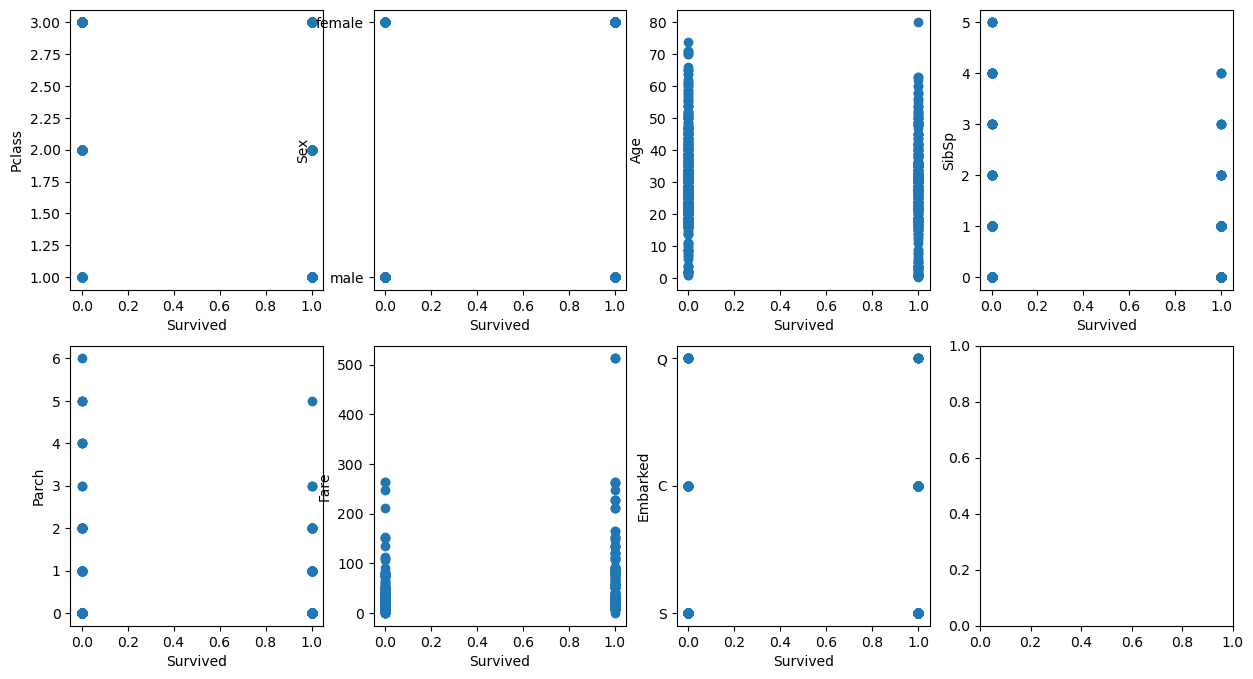

In [92]:
# plot to see correlations
import matplotlib.pyplot as plt
plot_data = cleaned.drop('Survived', axis=1)
fig, ax = plt.subplots(2,4, figsize=(15,8))
ax = ax.flatten()
for i, feature in enumerate(plot_data.columns):
    ax[i].scatter(cleaned['Survived'], plot_data[feature])
    ax[i].set_xlabel('Survived')
    ax[i].set_ylabel(feature)

# Encode

In [102]:
# encoding, get dummies for sex, embarked
cleaned = pd.get_dummies(cleaned, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

# split data
We have test data so we want X_train, y_train

In [103]:
X_train = cleaned.drop('Survived', axis=1)
y_train = cleaned['Survived'] 
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


# Normalise/Scale


In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit Model

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

# function to clean test data

In [230]:
def clean_titanic_data(df):
    cleaned = df.drop(['Name', 'PassengerId', 'Cabin','Ticket'], axis=1)
    # cleaned = cleaned.dropna()
    cleaned = pd.get_dummies(cleaned, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
    cleaned.loc[cleaned['Age'].isna(), 'Age'] = cleaned['Age'].mean()
    cleaned.loc[cleaned['Fare'].isna(), 'Fare'] = cleaned['Fare'].mean()
    return cleaned

In [231]:
test_data = pd.read_csv(r'data/titanic_test.csv')
test_data.shape

(418, 11)

# Predict

In [232]:
# import test data
test_data = pd.read_csv(r'data/titanic_test.csv')
test_cleaned = clean_titanic_data(test_data)
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_cleaned)
y_pred = model.predict(test_scaled)



In [233]:
test_cleaned.shape

(418, 8)

# Validate

In [235]:
# from sklearn.metrics import accuracy_score
# # total true positives/total
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

In [241]:
final_pred = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived': y_pred})
final_pred.to_csv(r'data/titanic_pred.csv', index=False)